In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()


/home/nlp/elronbandel/miniconda3/envs/squadlab/lib/python3.8/site-packages/tqdm/std.py:670: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Load Data

In [14]:
data = pd.read_csv('dataset_diabetes/diabetic_data.csv', na_values=['?', 'Unknown/Invalid'])

/home/nlp/elronbandel/miniconda3/envs/squadlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
data.head(1).T

,0
encounter_id,2278392
patient_nbr,8222157
race,Caucasian
gender,Female
age,[0-10)
weight,NaN
admission_type_id,6
discharge_disposition_id,25
admission_source_id,1
time_in_hospital,1


## Drop Highly Missing Values

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101763 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

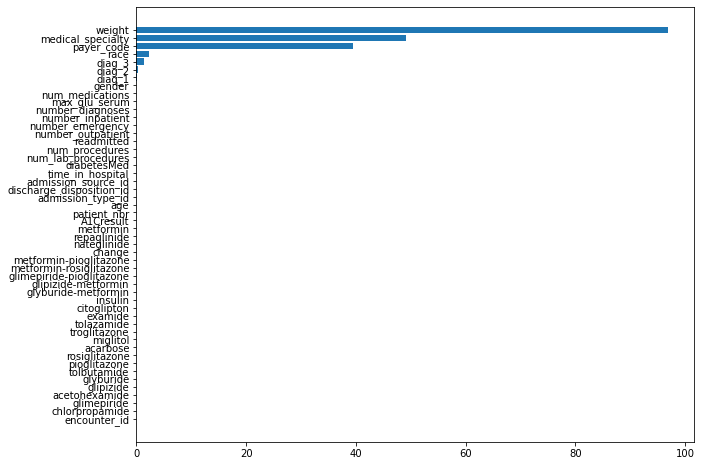

In [17]:
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':data.columns ,'na_percent':data.isnull().sum()/len(data)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

In [18]:
data.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)

## Drop entries with missing values

In [19]:
data.dropna(inplace=True)

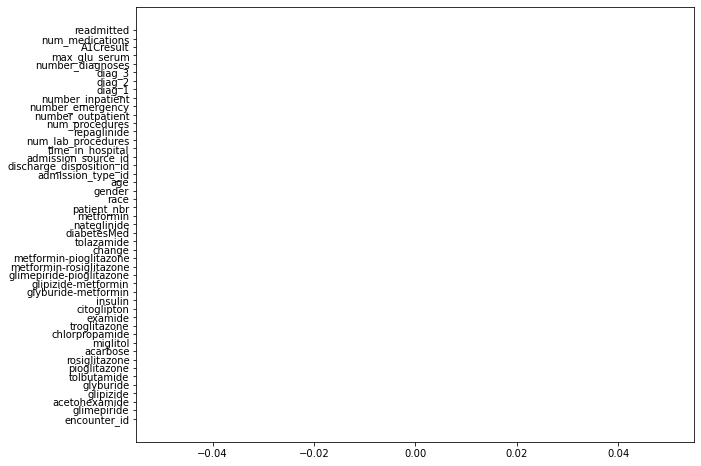

In [20]:
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':data.columns ,'na_percent':data.isnull().sum()/len(data)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

## Drop enteries with same values

In [21]:
data = data.drop(['citoglipton', 'examide'], axis = 1)

# Preprocess Data

In [22]:
data.loc[data.age== '[0-10)','age'] = 0;
data.loc[data.age== '[10-20)','age'] = 10;
data.loc[data.age== '[20-30)','age'] = 20;
data.loc[data.age== '[30-40)','age'] = 30;
data.loc[data.age== '[40-50)','age'] = 40;
data.loc[data.age== '[50-60)','age'] = 50;
data.loc[data.age== '[60-70)','age'] = 60;
data.loc[data.age== '[70-80)','age'] = 70;
data.loc[data.age== '[80-90)','age'] = 80;
data.loc[data.age== '[90-100)','age'] = 90;
data.age = data.age.astype(np.int32)


data.loc[data.max_glu_serum== 'None','max_glu_serum'] = 0;
data.loc[data.max_glu_serum== 'Norm','max_glu_serum'] = 100;
data.loc[data.max_glu_serum== '>200','max_glu_serum'] = 200;
data.loc[data.max_glu_serum== '>300','max_glu_serum'] = 300;
data.max_glu_serum = data.max_glu_serum.astype(np.int32)


data.loc[data.A1Cresult== 'None','A1Cresult'] = 0;
data.loc[data.A1Cresult== 'Norm','A1Cresult'] = 5;
data.loc[data.A1Cresult== '>7','A1Cresult'] = 7;
data.loc[data.A1Cresult== '>8','A1Cresult'] = 8;
data.A1Cresult = data.A1Cresult.astype(np.int32)


data.loc[data.change== 'No','change'] = 0;
data.loc[data.change== 'Ch','change'] = 1;
data.change = data.change.astype(np.int8)



data.loc[data.diabetesMed== 'No','diabetesMed'] = 0;
data.loc[data.diabetesMed== 'Yes','diabetesMed'] = 1;
data.diabetesMed = data.diabetesMed.astype(np.int8)


medications = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide",  "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]

for med in medications:
    data.loc[data[med] == 'No', med] = -20;
    data.loc[data[med] == 'Down', med] = -10;
    data.loc[data[med] == 'Steady', med] = 0;
    data.loc[data[med] == 'Up', med] = 10;
    data[med] = data[med].astype(np.int32)
    
data.loc[data.readmitted != 'NO','readmitted'] = 0;
data.loc[data.readmitted == 'NO','readmitted'] = 1;

categoricals = ['diag_1', 'diag_2', 'diag_3']



for c in categoricals:
    data[c] = pd.Categorical(data[c]).codes

In [23]:
data.head(1).T

,1
encounter_id,149190
patient_nbr,55629189
race,Caucasian
gender,Female
age,10
admission_type_id,1
discharge_disposition_id,1
admission_source_id,7
time_in_hospital,3
num_lab_procedures,59


In [24]:
data.to_csv('data_processed.csv', index=False)